In [1]:
# import z3
from z3 import *
from itertools import product, chain

def flatten(list_of_lists):
    "Flatten one level of nesting."
    return chain.from_iterable(list_of_lists)

In [2]:
y = Real('y')
x = Real('x')

c = x > 2, y < 10, x + 2*y == 7

In [3]:
s = Solver()
s.add(c)

In [4]:
s.check() == sat
s.model()

[y = 2, x = 3]

In [5]:
# Numbers placed in initial step
X = [[ Int(f'X_{i},{j}') for j in range(11)] for i in range(11) ]

# Numbers after placing black tiles
Y = [[ Int(f'Y_{i},{j}') for j in range(11)] for i in range(11) ]

In [6]:
c_range = [ (0 < x) ^ (x < 10) for x in flatten(X) ] + [ (0 <= y) ^ (y < 10) for y in flatten(Y) ]

In [ ]:
# regions = [
#     [X[0][i] for i in range(11)] + [X[1][0]] + [X[1][i] for i in range(2,11)],
# ]

grid = [
    [1,1,1,1,1,1,1,1,1,1,1],
    [1,2,1,1,1,1,1,1,1,1,1],
    [2,2,3,3,3,3,4,4,4,1,4],
    [2,3,3,2,3,5,4,4,4,4,4],
    [2,3,3,2,3,5,5,4,4,5,4],
    [2,2,2,2,2,5,5,5,5,5,4],
    [2,6,7,7,2,2,5,5,7,5,5],
    [2,6,7,7,7,7,7,7,7,8,8],
    [6,6,6,6,7,6,7,8,8,8,8],
    [6,6,6,6,6,6,6,6,6,6,6],
    [6,6,9,9,9,9,9,9,6,6,6]
]
c_regions = [ simplify(If(grid[i][j]==grid[k][l], X[i][j]==X[k][l], True)) for i,j,k,l in product(*([range(11)]*4))]

In [20]:

yellows = [
    (1,3),
    (1,4),
    (2,4),
    (2,9),
    (3,9),
    (3,8),
    (6,1),
    (6,2),
    (7,1),
    (5,5),
    (6,5),
    (7,5),
    (8,5),
    (6,6),
    (8,4),
    (9,4),
]
len(yellows)
c_yellows = [X[i][j] == Y[i][j] for i,j in yellows]
c_yellows

[X_1,3 == Y_1,3,
 X_1,4 == Y_1,4,
 X_2,4 == Y_2,4,
 X_2,9 == Y_2,9,
 X_3,9 == Y_3,9,
 X_3,8 == Y_3,8,
 X_6,1 == Y_6,1,
 X_6,2 == Y_6,2,
 X_7,1 == Y_7,1,
 X_5,5 == Y_5,5,
 X_6,5 == Y_6,5,
 X_7,5 == Y_7,5,
 X_8,5 == Y_8,5,
 X_6,6 == Y_6,6,
 X_8,4 == Y_8,4,
 X_9,4 == Y_9,4]

/tmp/ipykernel_374803/1182201140.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", np.max(grid_array) - np.min(grid_array) + 1)


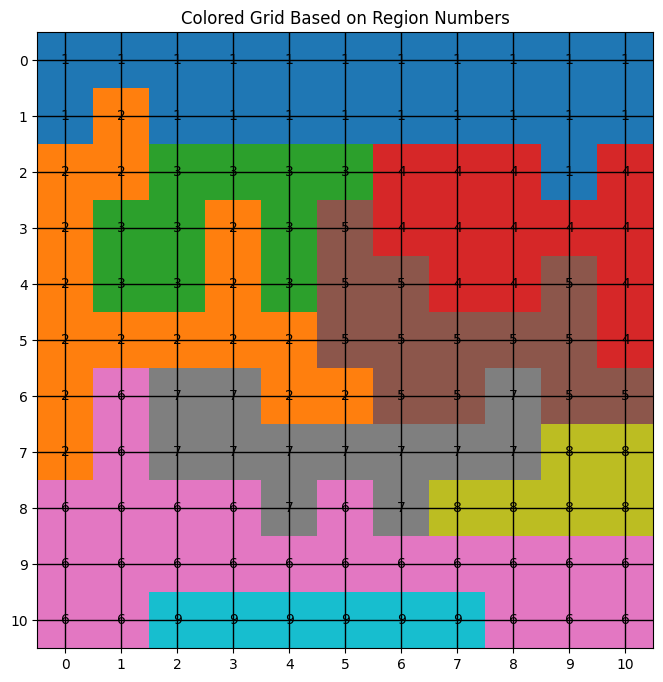

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the grid
grid = [
    [1,1,1,1,1,1,1,1,1,1,1],
    [1,2,1,1,1,1,1,1,1,1,1],
    [2,2,3,3,3,3,4,4,4,1,4],
    [2,3,3,2,3,5,4,4,4,4,4],
    [2,3,3,2,3,5,5,4,4,5,4],
    [2,2,2,2,2,5,5,5,5,5,4],
    [2,6,7,7,2,2,5,5,7,5,5],
    [2,6,7,7,7,7,7,7,7,8,8],
    [6,6,6,6,7,6,7,8,8,8,8],
    [6,6,6,6,6,6,6,6,6,6,6],
    [6,6,9,9,9,9,9,9,6,6,6]
]

# Convert the grid to a NumPy array
grid_array = np.array(grid)

# Create a colormap
cmap = plt.cm.get_cmap("tab10", np.max(grid_array) - np.min(grid_array) + 1)

# Plot the grid
plt.figure(figsize=(8, 8))
plt.imshow(grid_array, cmap=cmap, origin="upper")

# Add gridlines
plt.grid(which="major", color="black", linestyle="-", linewidth=1)
plt.xticks(range(len(grid[0])))
plt.yticks(range(len(grid)))

# Add labels to each cell
for i in range(len(grid)):
    for j in range(len(grid[i])):
        plt.text(j, i, str(grid[i][j]), ha="center", va="center", color="black")

plt.title("Colored Grid Based on Region Numbers")
plt.show()

In [ ]:
# [for i in range()]